In [22]:
import numpy as np
import matplotlib.pyplot as plt
import csv

def Draw_routes(points_file, route_file=None):
    # --- Load points (x;y;size) ---
    points = []
    with open(points_file, newline='') as f:
        reader = csv.reader(f, delimiter=';')
        for row in reader:
            if len(row) >= 3:
                x, y, s = map(float, row)
                points.append((x, y, s))

    points = np.array(points)
    positions = points[:, :2]
    sizes = points[:, 2]

    # --- Normalize sizes (largest = 10× smallest) ---
    min_s, max_s = sizes.min(), sizes.max()
    if max_s > min_s:
        sizes_norm = 10 * (sizes - min_s) / (max_s - min_s) + 1
    else:
        sizes_norm = np.ones_like(sizes)

    # --- Case 1: No route file → only plot points ---
    if route_file is None:
        fig, ax = plt.subplots(figsize=(6, 6))
        ax.set_title('Raw nodes')
        ax.scatter(positions[:, 0], positions[:, 1], s=sizes_norm * 2)
        ax.set_aspect('equal', adjustable='box')   # Keep x and y scales proportional
        plt.tight_layout()
        plt.show()
        return

    # --- Case 2: Route file provided ---
    routes = []
    with open(route_file, newline='') as f:
        reader = csv.reader(f, delimiter=';')
        for row in reader:
            route = [int(i) for i in row if i.strip() != '']
            if route:
                routes.append(route)

    # --- Create subplots (one per route) ---
    nplots = len(routes)
    fig, ax = plt.subplots(nplots, sharex=True, sharey=True, figsize=(6, 6 * nplots))  # Each plot square

    if nplots == 1:
        ax = [ax]
    else:
        ax = ax.ravel()

    for idx, route in enumerate(routes):
        ax[idx].scatter(positions[:, 0], positions[:, 1], s=sizes_norm * 2)
        ax[idx].set_aspect('equal', adjustable='box')  # Maintain proportional axes

        for i in range(len(route) - 1):
            start_node = route[i]
            end_node = route[i + 1]
            start_pos = positions[start_node]
            end_pos = positions[end_node]
            ax[idx].annotate("",
                             xy=end_pos, xycoords='data',
                             xytext=start_pos, textcoords='data',
                             arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))

        # --- Close the route loop ---
        start_pos = positions[route[-1]]
        end_pos = positions[route[0]]
        ax[idx].annotate("", xy=end_pos, xycoords='data',
                         xytext=start_pos, textcoords='data',
                         arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))

    plt.tight_layout()
    plt.show()


Drawing raw points for TSPA


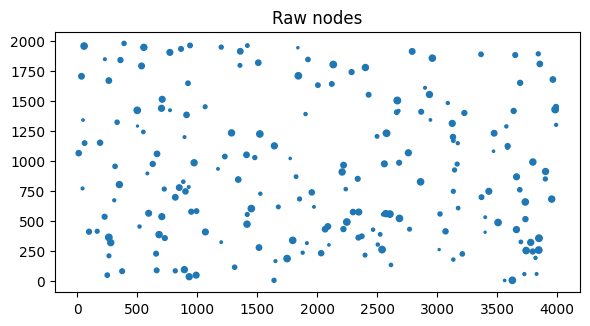

Drawing Random for TSPA


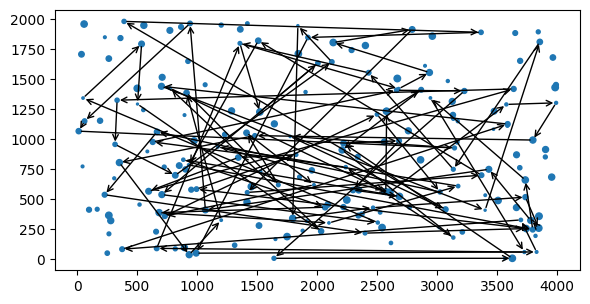

Drawing NNE for TSPA


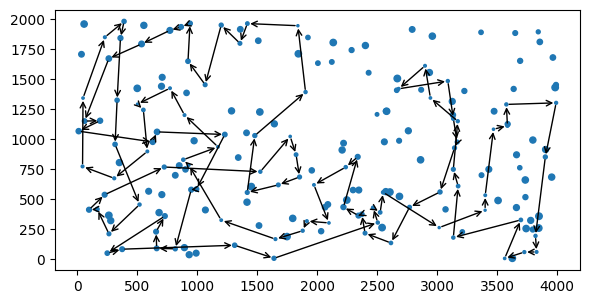

Drawing NN for TSPA


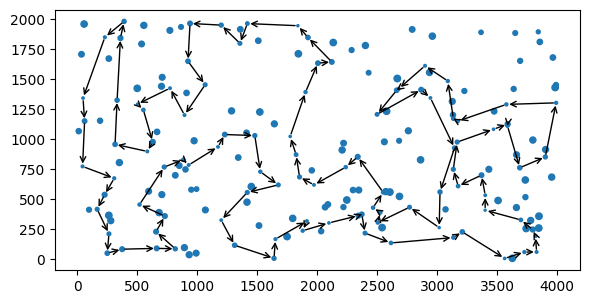

Drawing GC for TSPA


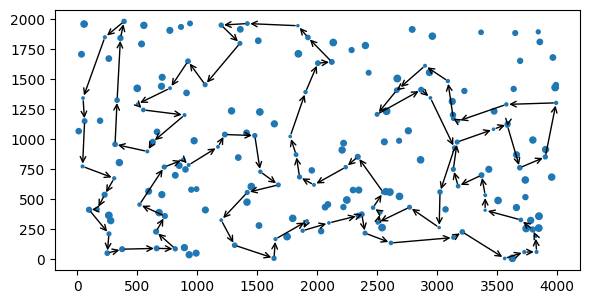

Drawing raw points for TSPB


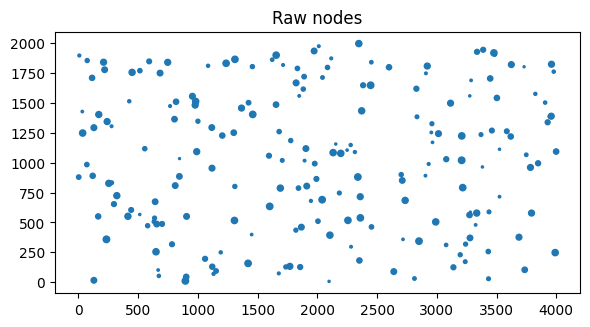

Drawing Random for TSPB


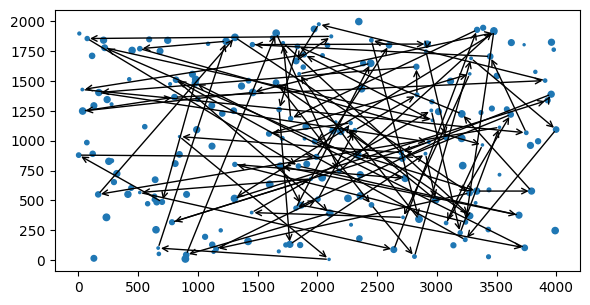

Drawing NNE for TSPB


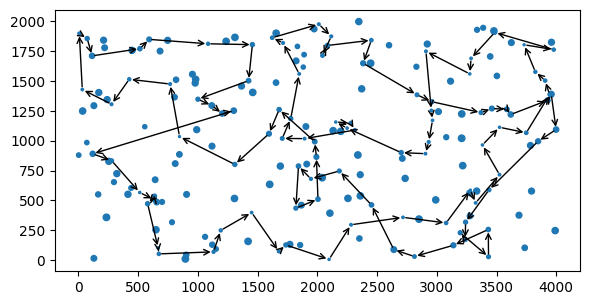

Drawing NN for TSPB


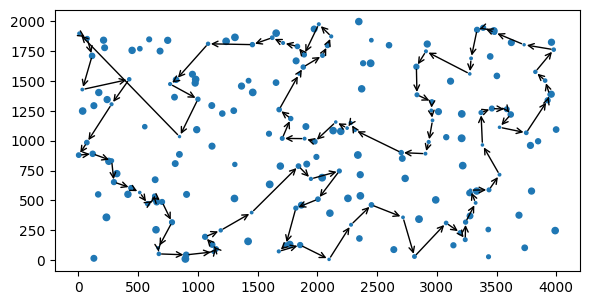

Drawing GC for TSPB


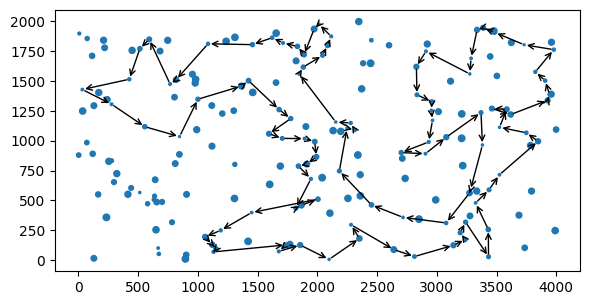

In [23]:
for i in  ['A', 'B']:
    print(f'Drawing raw points for TSP{i}')
    Draw_routes(f'TSP{i}.csv')
    for j in ['Random', 'NNE', 'NN', 'GC']:
        print(f'Drawing {j} for TSP{i}')
        Draw_routes(f'TSP{i}.csv', f'{j}_best_{i}.csv')